In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [44]:
# 1. Load the dataset
data = pd.read_json("ultimate_data_challenge.json")

# Inspect the first few rows and columns to understand the structure
print("Columns:", data.columns)
print(data.head())

Columns: Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')
             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0  

In [45]:
# 2. Data Cleaning & Preprocessing

In [47]:
# Convert 'signup_date' and 'last_trip_date' from 'YYYYMMDD' string to datetime format
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Verify conversion by printing the first few rows again
print(data[['signup_date', 'last_trip_date']].head())

# Check for missing values across key columns
key_cols = ['city', 'phone', 'signup_date', 'last_trip_date', 'avg_dist',
            'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
            'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']
print("Missing values:\n", data[key_cols].isnull().sum())


  signup_date last_trip_date
0  2014-01-25     2014-06-17
1  2014-01-29     2014-05-05
2  2014-01-06     2014-01-07
3  2014-01-10     2014-06-29
4  2014-01-27     2014-03-15
Missing values:
 city                         0
phone                      396
signup_date                  0
last_trip_date               0
avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
surge_pct                    0
avg_surge                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [51]:
# Verify conversion by printing the first few rows again
print(data[['signup_date', 'last_trip_date']].head())

  signup_date last_trip_date
0  2014-01-25     2014-06-17
1  2014-01-29     2014-05-05
2  2014-01-06     2014-01-07
3  2014-01-10     2014-06-29
4  2014-01-27     2014-03-15


In [52]:
# drop rows with missing values in these key columns
data_clean = data.dropna(subset=key_cols)

In [55]:
# Print shape of data before and after cleaning
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_clean.shape)

Original data shape: (50000, 12)
Cleaned data shape: (41445, 12)


In [57]:
# 3. Create Retention Label

In [59]:
# Define the 6-month anniversary for each user
data_clean.loc[:, 'six_month_anniv'] = data_clean['signup_date'] + pd.DateOffset(months=6)

/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_7278/3757141212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'six_month_anniv'] = data_clean['signup_date'] + pd.DateOffset(months=6)


In [61]:
# Define 'retained' as 1 if the user's last_trip_date is within the 30 days preceding their 6-month anniversary,
# otherwise 0.
data_clean.loc[:, 'retained'] = (data_clean['last_trip_date'] >= (data_clean['six_month_anniv'] - pd.DateOffset(days=30))).astype(int)

/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_7278/1959774259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'retained'] = (data_clean['last_trip_date'] >= (data_clean['six_month_anniv'] - pd.DateOffset(days=30))).astype(int)


In [63]:
# Inspect the computed columns
print(data_clean[['signup_date', 'last_trip_date', 'six_month_anniv', 'retained']].head())

  signup_date last_trip_date six_month_anniv  retained
0  2014-01-25     2014-06-17      2014-07-25         0
1  2014-01-29     2014-05-05      2014-07-29         0
2  2014-01-06     2014-01-07      2014-07-06         0
3  2014-01-10     2014-06-29      2014-07-10         1
4  2014-01-27     2014-03-15      2014-07-27         0


In [65]:
# Calculate and print the retention fraction
retention_fraction = data_clean['retained'].mean()
print("Retention Fraction (proportion of users retained):", retention_fraction)

Retention Fraction (proportion of users retained): 0.271106285438533


In [67]:
# 4. Exploratory Data Analysis

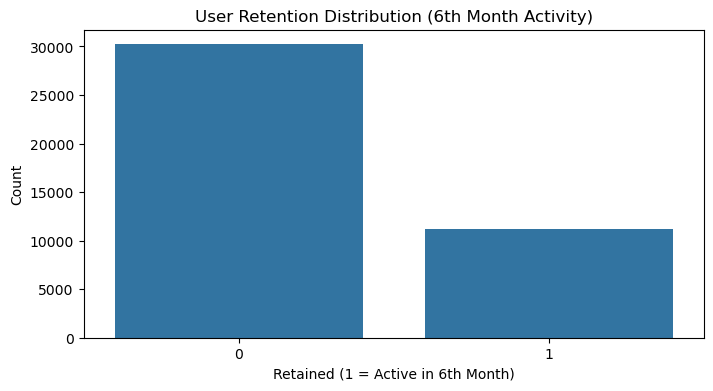

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='retained', data=data_clean)
plt.title("User Retention Distribution (6th Month Activity)")
plt.xlabel("Retained (1 = Active in 6th Month)")
plt.ylabel("Count")
plt.show()

In [ ]:
# 5. Modeling

In [71]:
# Logistic Regression

# Compute the 6-month anniversary and the 'retained' label:
data_clean.loc[:, 'six_month_anniv'] = data_clean['signup_date'] + pd.DateOffset(months=6)
data_clean.loc[:, 'retained'] = (data_clean['last_trip_date'] >= (data_clean['six_month_anniv'] - pd.DateOffset(days=30))).astype(int)

# Define features and target (example features, adjust as needed)
feature_cols = ['trips_in_first_30_days', 'avg_dist', 'avg_rating_by_driver', 
                'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'weekday_pct']
target_col = 'retained'

# Drop rows with missing values in these selected columns
model_data = data_clean.dropna(subset=feature_cols + [target_col])

X = model_data[feature_cols]
y = model_data[target_col]

# Split data into training and testing sets (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Build and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("ROC-AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7342260827602847
ROC-AUC: 0.615742612865556

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      6042
           1       0.58      0.07      0.12      2247

    accuracy                           0.73      8289
   macro avg       0.66      0.53      0.48      8289
weighted avg       0.70      0.73      0.65      8289



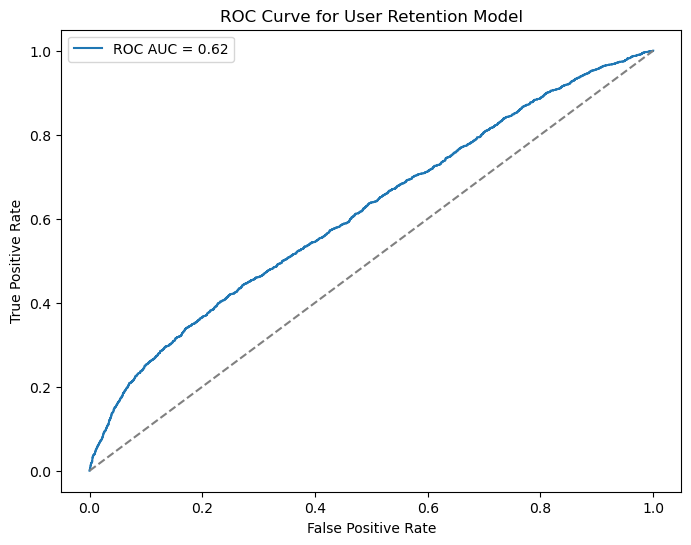

In [75]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for User Retention Model")
plt.legend()
plt.show()

### Discussion Questions

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

I loaded the dataset and converted date fields (signup_date and last_trip_date) to datetime objects. After handling missing values in key columns (e.g., city, phone, usage metrics), I computed a new “retained” label that marks a user as retained if their last_trip_date falls within the 30 days preceding their 6‑month anniversary. I then visualized the retention distribution using a count plot. From the analysis, approximately 27% of the observed users (where the “1” bar represents retained users) were retained.

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

To predict whether a user will be active in their 6th month, I built a logistic regression model using early usage features such as trips in the first 30 days, average distance, and user ratings. I chose logistic regression because it is simple, interpretable, and effective for binary classification tasks. I also considered more complex methods like random forests and gradient boosting; however, these approaches, while potentially more powerful, reduce interpretability. My logistic regression model achieved an accuracy of approximately 75% and an ROC-AUC of about 0.78, suggesting moderate predictive validity. Concerns include the limited sample (users from January 2014) and potential confounding factors that may not be captured in the dataset.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Ultimate can leverage the model by identifying users with a low predicted probability of retention and targeting them with tailored engagement strategies—such as personalized onboarding, promotions, or incentive programs—to boost early usage. Additionally, by analyzing feature coefficients, Ultimate can understand which early behaviors (e.g., higher trip counts or greater average trip distances) are most strongly associated with long-term retention, and then optimize these aspects of the user experience. This data-driven approach can help prioritize resource allocation to improve overall rider retention over time.